# Import libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score


# Prepare variables

In [2]:
df=pd.read_csv("compiled_full merged.csv")

# Remove duplicates if existing

In [3]:
len(df)

10303

In [4]:
df.drop_duplicates(inplace=True)
len(df)

9858

In [5]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms',
       'artist', 'song_title', 'explicit', 'popularity'],
      dtype='object')

# prep x by removing unneeded columns

In [6]:
x=df.drop(labels=['id','artist','song_title'], axis=1)
x.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'explicit', 'popularity'],
      dtype='object')

## Re-code explicit

In [7]:
x.loc[x['explicit']==True,'explicit']=1
x.loc[x['explicit']==False,'explicit']=0

# Scale data

In [8]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)

# Save scalar

In [10]:
with open("Model/scaler.pickle", "wb") as f:
	pickle.dump(scaler,f)

# Check best number of clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

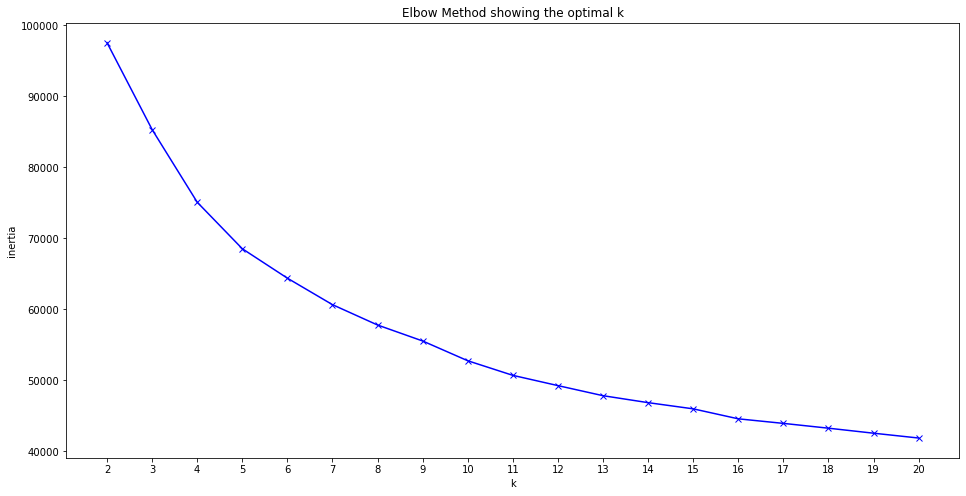

In [11]:
K = range(2, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [12]:
for i in range(1,len(inertia)):
    print(i+1,inertia[i]-inertia[(i-1)])

2 -12238.756153138864
3 -10230.145308134073
4 -6554.497610316757
5 -4146.601754042691
6 -3730.899264314983
7 -2866.68440481399
8 -2250.3435183186884
9 -2783.3297564081804
10 -2055.2979162743068
11 -1445.4073010015782
12 -1420.3121821619934
13 -979.546818319046
14 -872.0960333595649
15 -1406.1770177802682
16 -642.1886569088092
17 -677.2477856282858
18 -705.7561814078726
19 -680.0377954821379


In [13]:
kmeans = KMeans(n_clusters=13, random_state=1234)

kmeans.fit(x_scaled_df)

KMeans(n_clusters=13, random_state=1234)

# Save KMeans

In [15]:
with open("Model/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [16]:
clusters = kmeans.predict(x_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      463
1     1644
2       88
3      688
4      286
5      510
6     1020
7      764
8      211
9     1036
10    1391
11    1282
12     475
dtype: int64

In [17]:
kmeans.inertia_

47834.37474421681

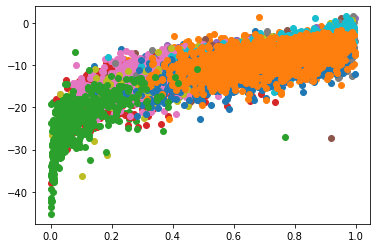

In [18]:
# assign a cluster to each example
labels = kmeans.predict(x_scaled_df)
# retrieve unique clusters
clusters2 = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters2:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(x.to_numpy()[row_ix, 1], x.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [20]:
kmeans2 = KMeans(n_clusters=13,
                init="k-means++",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=300,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(x_scaled_df)
print(kmeans2.inertia_)

47833.72390126749


In [21]:
x['clusters']=clusters
x['id']=df['id']
x['artist']=df['artist']
x['song_title']=df['song_title']

# Export data file with clusters

In [22]:
x.to_csv('Data\songs_with_clusters.csv', index=False)

# Check silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

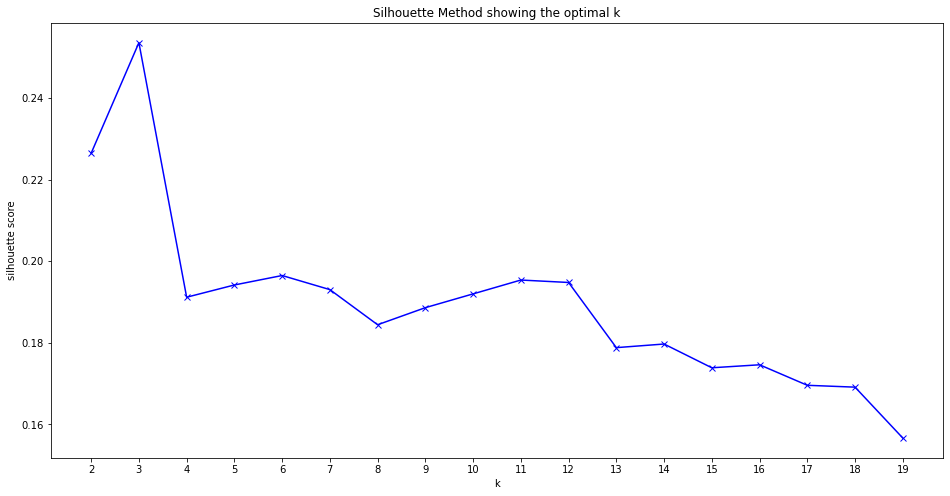

In [25]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    silhouette.append(silhouette_score(x_scaled_df, kmeans.predict(x_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')


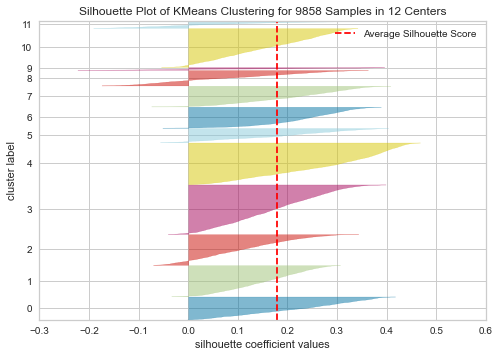

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 9858 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(12, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(x_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure